In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")

In [4]:
# define the state
class LLMstate(TypedDict):
    question: str
    answer: str

In [5]:
def LLM_QA(state: LLMstate) -> LLMstate:
    
    # extract question from the state
    question = state['question']

    # crate a prompt
    prompt = f"Answer the following question: {question}"

    # send the prompt to the llm
    answer = model.invoke(prompt).content

    # update the answer in the state
    state['answer'] = str(answer)

    return state

In [6]:
# define the graph
graph = StateGraph(LLMstate)

# add nodes to the graph
graph.add_node("chat with LLM", LLM_QA)

# add edges to the graph
graph.add_edge(START, "chat with LLM")
graph.add_edge("chat with LLM", END)

# compile the graph
workflow = graph.compile()

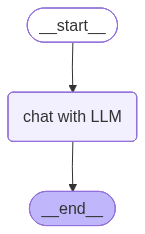

In [7]:
from IPython.display import Image, display

display(Image(workflow.get_graph().draw_mermaid_png()))

In [8]:
# execute the graph
workflow.invoke({'question': "what is the capital of Bangladesh"})

{'question': 'what is the capital of Bangladesh',
 'answer': 'The capital of Bangladesh is **Dhaka**.'}